In [ ]:
#importing libraries
import pandas as pd
import numpy as np

#for text pre-processing
import nltk
nltk.download("popular")
from nltk.tokenize import sent_tokenize, word_tokenize
import re, string
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import SnowballStemmer
from nltk.corpus import wordnet
from nltk.stem import WordNetLemmatizer
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')
nltk.download('wordnet')

# bag of words
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer

[nltk_data] Downloading collection 'popular'
[nltk_data]    | 
[nltk_data]    | Downloading package cmudict to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/cmudict.zip.
[nltk_data]    | Downloading package gazetteers to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/gazetteers.zip.
[nltk_data]    | Downloading package genesis to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/genesis.zip.
[nltk_data]    | Downloading package gutenberg to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/gutenberg.zip.
[nltk_data]    | Downloading package inaugural to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/inaugural.zip.
[nltk_data]    | Downloading package movie_reviews to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping corpora/movie_reviews.zip.
[nltk_data]    | Downloading package names to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/names.zip.
[nltk_data]    | Downloading package shakespeare to /root/nltk_data...
[nlt

# Loading the data set & Exploratory Data Analysis (EDA)

In [ ]:
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

# Sample text data
text_sport = "Baseball, a captivating steeped in tradition, pits two squads of nine players against each other in a battle for runs across a diamond-shaped field. The game unfolds over nine innings, each meticulously divided into two halves. During the top half, one team takes center stage as their batters swing for the fences, aiming to launch the ball into the vast expanse of the outfield and sprint around the bases, each successful circuit adding a coveted run to their scorecard. The opposing team, transformed into a defensive unit, scrambles to thwart their offensive maneuvers, deploying dazzling catches and lightning-fast throws to any base a runner might dare to steal. As the final out of the top half echoes, the roles gracefully reverse. The previous defenders morph into a potent offense, while the former hitters transform into a defensive wall, determined to shut down any scoring attempts. This intricate dance of offense and defense continues for nine heart-stopping innings, with the team boasting the highest run total at the game's conclusion emerging victorious. The stage for this strategic ballet is a meticulously maintained diamond. Four cornerstones – home plate, first base, second base, and third base – mark the boundaries of this grassy battlefield. In the heart of the infield lies the pitcher's mound, a raised platform from where the pitcher, the maestro of the defensive orchestra, unleashes a barrage of precisely thrown balls towards the batter stationed at home plate. Beyond the infield, a vast expanse of green known as the outfield stretches outwards, bordered by the extended lines of first and third base. This simple act sets in motion a whirlwind of activity.  The batter races towards first base, hoping to reach it safely before a fielder throws the ball there.  Success in this daring dash earns them the right to be called a 'base runner,'' and they set their sights on the next base, and the next, until they complete the glorious loop around the diamond and touch home plate, bringing a run home for their team.  However, the defensive team isn't idle.  They strive to snatch the ball out of the air before it bounces, or with lightning reflexes, scoop it up and fire it towards a base to 'tag out' the runner before they make it. A batter's journey around the bases can be cut short in several ways. A dazzling catch by a fielder, a perfectly timed throw to first base, or the dreaded 'strikeout' – three missed swings at the pitcher's offerings – can all spell an out for the batter. Once the offensive team accumulates three outs, their turn at bat concludes, and the defensive team gets their chance to shine. Baseball's magic lies in its captivating blend of athleticism and strategy. Pitchers rely on cunning and precision to outwit batters, who in turn unleash their power and technique to launch the ball. Fielders showcase their agility and lightning-fast throws, while base runners weave their way around the diamond, using a combination of speed and smarts to evade tags. This dynamic interplay, combined with the sport's rich history, passionate fan base, and intricate statistical analysis, has cemented baseball's place as a beloved global pastime."
text_medical = "As of now Public Health in Indonesia can be said to be in a condition which is as of now showing signs of improvement, albeit there are still a few individuals who are living a long way from a sound way of life. The change in the state of Public Health in Indonesia is an indication of the media which frequently give instructive data so that the individuals are taught naturally. The significance of general wellbeing makes the science training secure a workforce which spends significant time in the field of general wellbeing. The administration desires on this workforce is to examine the general wellbeing for the future, so that the general public are fit for conveying a sound and insightful individuals in keeping up their own particular wellbeing and gang. The art of general wellbeing has an importance as the science and craft of averting infection, enhancing physical and emotional well-being. The point of keeping up productivity through composed group is to enhance ecological sanitation, the association of medicinal administrations and consideration, singular instruction on individual cleanliness for right on time analysis, preventive and social parts of advancement, which will bolster everybody in the group to have a solid expectations for everyday comforts to keep up their wellbeing. The Scope of Public wellbeing science in Indonesia is the Nutrition Society, the examination identified with sustenance has turned into an intriguing subject, in light of the fact that there are numerous individuals who are in consistence with the wholesome yet near to typical. It implies that the dietary ampleness rate in Indonesia, particularly in country groups are still low. Numerous individuals are as yet expending the nourishment which are not ideal supplements, it likewise causes numerous instances of ailing health et cetera. Great HR gets from a decent general wellbeing. Wholesome issues in Indonesia is an extraordinary issue which still cannot be tackled totally. Actually, there are numerous different parts of general wellbeing, for example, Epidemiology, Bio-insights, Environmental Health, Health Education and Behavior, Public Health Administration, Occupational Safety and Health and Reproductive Health which are still expected to be concerned.The significance of general wellbeing in Indonesia ought to truly get more consideration, in light of the fact that society is an impression of a nation. However the Country will keep developing on account of the presence of its Human Resources."
text_finance = "Gross domestic product, a broad measure of goods and services produced in the January-through-March period, increased at a 1.6% annualized pace when adjusted for seasonality and inflation, according to the department’s Bureau of Economic Analysis. Economists surveyed by Dow Jones had been looking for an increase of 2.4% following a 3.4% gain in the fourth quarter of 2023 and 4.9% in the previous period. Markets slumped following the news, with futures tied to the Dow Jones Industrial Average off more than 400 points. Treasury yields moved higher, with the benchmark 10-year note most recently at 4.69%. Consumer spending increased 2.5% in the period, down from a 3.3% gain in the fourth quarter and below the 3% Wall Street estimate. Fixed investment and government spending at the state and local level helped keep GDP positive on the quarter, while a decline in private inventory investment and an increase in imports subtracted. Net exports subtracted 0.86 percentage points from the growth rate while consumer spending contributed 1.68 percentage points. The personal consumption expenditures price index, a key inflation variable for the Federal Reserve, rose at a 3.4% annualized pace for the quarter, its biggest gain in a year and up from 1.8% in the fourth quarter. Excluding food and energy, core PCE prices rose at a 3.7% rate, both well above the Fed’s 2% target. Central bank officials tend to focus on core inflation as a stronger indicator of long-term trends. The price index for GDP, sometimes called the “chain-weighted” level, increased at a 3.1% rate, compared to the Dow Jones estimate for a 3% increase."

texts = [text_sport, text_medical, text_finance]

In [ ]:
from nltk.tokenize import sent_tokenize

# Teks yang akan di-tokenisasi
texts = [
    "Baseball, a captivating steeped in tradition, pits two squads of nine players against each other in a battle for runs across a diamond-shaped field. The game unfolds over nine innings, each meticulously divided into two halves. During the top half, one team takes center stage as their batters swing for the fences, aiming to launch the ball into the vast expanse of the outfield and sprint around the bases, each successful circuit adding a coveted run to their scorecard. The opposing team, transformed into a defensive unit, scrambles to thwart their offensive maneuvers, deploying dazzling catches and lightning-fast throws to any base a runner might dare to steal. As the final out of the top half echoes, the roles gracefully reverse. The previous defenders morph into a potent offense, while the former hitters transform into a defensive wall, determined to shut down any scoring attempts. This intricate dance of offense and defense continues for nine heart-stopping innings, with the team boasting the highest run total at the game's conclusion emerging victorious. The stage for this strategic ballet is a meticulously maintained diamond. Four cornerstones – home plate, first base, second base, and third base – mark the boundaries of this grassy battlefield. In the heart of the infield lies the pitcher's mound, a raised platform from where the pitcher, the maestro of the defensive orchestra, unleashes a barrage of precisely thrown balls towards the batter stationed at home plate. Beyond the infield, a vast expanse of green known as the outfield stretches outwards, bordered by the extended lines of first and third base. This simple act sets in motion a whirlwind of activity.  The batter races towards first base, hoping to reach it safely before a fielder throws the ball there.  Success in this daring dash earns them the right to be called a 'base runner,'' and they set their sights on the next base, and the next, until they complete the glorious loop around the diamond and touch home plate, bringing a run home for their team.  However, the defensive team isn't idle.  They strive to snatch the ball out of the air before it bounces, or with lightning reflexes, scoop it up and fire it towards a base to 'tag out' the runner before they make it. A batter's journey around the bases can be cut short in several ways. A dazzling catch by a fielder, a perfectly timed throw to first base, or the dreaded 'strikeout' – three missed swings at the pitcher's offerings – can all spell an out for the batter. Once the offensive team accumulates three outs, their turn at bat concludes, and the defensive team gets their chance to shine. Baseball's magic lies in its captivating blend of athleticism and strategy. Pitchers rely on cunning and precision to outwit batters, who in turn unleash their power and technique to launch the ball. Fielders showcase their agility and lightning-fast throws, while base runners weave their way around the diamond, using a combination of speed and smarts to evade tags. This dynamic interplay, combined with the sport's rich history, passionate fan base, and intricate statistical analysis, has cemented baseball's place as a beloved global pastime.",
    "As of now Public Health in Indonesia can be said to be in a condition which is as of now showing signs of improvement, albeit there are still a few individuals who are living a long way from a sound way of life. The change in the state of Public Health in Indonesia is an indication of the media which frequently give instructive data so that the individuals are taught naturally. The significance of general wellbeing makes the science training secure a workforce which spends significant time in the field of general wellbeing. The administration desires on this workforce is to examine the general wellbeing for the future, so that the general public are fit for conveying a sound and insightful individuals in keeping up their own particular wellbeing and gang. The art of general wellbeing has an importance as the science and craft of averting infection, enhancing physical and emotional well-being. The point of keeping up productivity through composed group is to enhance ecological sanitation, the association of medicinal administrations and consideration, singular instruction on individual cleanliness for right on time analysis, preventive and social parts of advancement, which will bolster everybody in the group to have a solid expectations for everyday comforts to keep up their wellbeing. The Scope of Public wellbeing science in Indonesia is the Nutrition Society, the examination identified with sustenance has turned into an intriguing subject, in light of the fact that there are numerous individuals who are in consistence with the wholesome yet near to typical. It implies that the dietary ampleness rate in Indonesia, particularly in country groups are still low. Numerous individuals are as yet expending the nourishment which are not ideal supplements, it likewise causes numerous instances of ailing health et cetera. Great HR gets from a decent general wellbeing. Wholesome issues in Indonesia is an extraordinary issue which still cannot be tackled totally. Actually, there are numerous different parts of general wellbeing, for example, Epidemiology, Bio-insights, Environmental Health, Health Education and Behavior, Public Health Administration, Occupational Safety and Health and Reproductive Health which are still expected to be concerned.The significance of general wellbeing in Indonesia ought to truly get more consideration, in light of the fact that society is an impression of a nation. However the Country will keep developing on account of the presence of its Human Resources.",
    "Gross domestic product, a broad measure of goods and services produced in the January-through-March period, increased at a 1.6% annualized pace when adjusted for seasonality and inflation, according to the department’s Bureau of Economic Analysis. Economists surveyed by Dow Jones had been looking for an increase of 2.4% following a 3.4% gain in the fourth quarter of 2023 and 4.9% in the previous period. Markets slumped following the news, with futures tied to the Dow Jones Industrial Average off more than 400 points. Treasury yields moved higher, with the benchmark 10-year note most recently at 4.69%. Consumer spending increased 2.5% in the period, down from a 3.3% gain in the fourth quarter and below the 3% Wall Street estimate. Fixed investment and government spending at the state and local level helped keep GDP positive on the quarter, while a decline in private inventory investment and an increase in imports subtracted. Net exports subtracted 0.86 percentage points from the growth rate while consumer spending contributed 1.68 percentage points. The personal consumption expenditures price index, a key inflation variable for the Federal Reserve, rose at a 3.4% annualized pace for the quarter, its biggest gain in a year and up from 1.8% in the fourth quarter. Excluding food and energy, core PCE prices rose at a 3.7% rate, both well above the Fed’s 2% target. Central bank officials tend to focus on core inflation as a stronger indicator of long-term trends. The price index for GDP, sometimes called the “chain-weighted” level, increased at a 3.1% rate, compared to the Dow Jones estimate for a 3% increase."
]

# Melakukan tokenisasi untuk setiap teks dalam list
tokenized_texts = []

for text in texts:
    # Memecah teks menjadi kalimat-kalimat
    sentences = sent_tokenize(text)
    tokenized_texts.append(sentences)

# Menampilkan hasil tokenisasi dari setiap teks
for i, sentences in enumerate(tokenized_texts):
    print(f"Text {i+1}:")
    for j, sentence in enumerate(sentences):
        print(f"Sentence {j+1}: {sentence}")
    print(f"Number of sentences: {len(sentences)}")
    print()


Text 1:
Sentence 1: Baseball, a captivating steeped in tradition, pits two squads of nine players against each other in a battle for runs across a diamond-shaped field.
Sentence 2: The game unfolds over nine innings, each meticulously divided into two halves.
Sentence 3: During the top half, one team takes center stage as their batters swing for the fences, aiming to launch the ball into the vast expanse of the outfield and sprint around the bases, each successful circuit adding a coveted run to their scorecard.
Sentence 4: The opposing team, transformed into a defensive unit, scrambles to thwart their offensive maneuvers, deploying dazzling catches and lightning-fast throws to any base a runner might dare to steal.
Sentence 5: As the final out of the top half echoes, the roles gracefully reverse.
Sentence 6: The previous defenders morph into a potent offense, while the former hitters transform into a defensive wall, determined to shut down any scoring attempts.
Sentence 7: This intric

In [ ]:
from nltk.tokenize import word_tokenize

# Teks yang akan di-tokenisasi
texts = [
    "Baseball, a captivating steeped in tradition, pits two squads of nine players against each other in a battle for runs across a diamond-shaped field. The game unfolds over nine innings, each meticulously divided into two halves. During the top half, one team takes center stage as their batters swing for the fences, aiming to launch the ball into the vast expanse of the outfield and sprint around the bases, each successful circuit adding a coveted run to their scorecard. The opposing team, transformed into a defensive unit, scrambles to thwart their offensive maneuvers, deploying dazzling catches and lightning-fast throws to any base a runner might dare to steal. As the final out of the top half echoes, the roles gracefully reverse. The previous defenders morph into a potent offense, while the former hitters transform into a defensive wall, determined to shut down any scoring attempts. This intricate dance of offense and defense continues for nine heart-stopping innings, with the team boasting the highest run total at the game's conclusion emerging victorious. The stage for this strategic ballet is a meticulously maintained diamond. Four cornerstones – home plate, first base, second base, and third base – mark the boundaries of this grassy battlefield. In the heart of the infield lies the pitcher's mound, a raised platform from where the pitcher, the maestro of the defensive orchestra, unleashes a barrage of precisely thrown balls towards the batter stationed at home plate. Beyond the infield, a vast expanse of green known as the outfield stretches outwards, bordered by the extended lines of first and third base. This simple act sets in motion a whirlwind of activity.  The batter races towards first base, hoping to reach it safely before a fielder throws the ball there.  Success in this daring dash earns them the right to be called a 'base runner,'' and they set their sights on the next base, and the next, until they complete the glorious loop around the diamond and touch home plate, bringing a run home for their team.  However, the defensive team isn't idle.  They strive to snatch the ball out of the air before it bounces, or with lightning reflexes, scoop it up and fire it towards a base to 'tag out' the runner before they make it. A batter's journey around the bases can be cut short in several ways. A dazzling catch by a fielder, a perfectly timed throw to first base, or the dreaded 'strikeout' – three missed swings at the pitcher's offerings – can all spell an out for the batter. Once the offensive team accumulates three outs, their turn at bat concludes, and the defensive team gets their chance to shine. Baseball's magic lies in its captivating blend of athleticism and strategy. Pitchers rely on cunning and precision to outwit batters, who in turn unleash their power and technique to launch the ball. Fielders showcase their agility and lightning-fast throws, while base runners weave their way around the diamond, using a combination of speed and smarts to evade tags. This dynamic interplay, combined with the sport's rich history, passionate fan base, and intricate statistical analysis, has cemented baseball's place as a beloved global pastime.",
    "As of now Public Health in Indonesia can be said to be in a condition which is as of now showing signs of improvement, albeit there are still a few individuals who are living a long way from a sound way of life. The change in the state of Public Health in Indonesia is an indication of the media which frequently give instructive data so that the individuals are taught naturally. The significance of general wellbeing makes the science training secure a workforce which spends significant time in the field of general wellbeing. The administration desires on this workforce is to examine the general wellbeing for the future, so that the general public are fit for conveying a sound and insightful individuals in keeping up their own particular wellbeing and gang. The art of general wellbeing has an importance as the science and craft of averting infection, enhancing physical and emotional well-being. The point of keeping up productivity through composed group is to enhance ecological sanitation, the association of medicinal administrations and consideration, singular instruction on individual cleanliness for right on time analysis, preventive and social parts of advancement, which will bolster everybody in the group to have a solid expectations for everyday comforts to keep up their wellbeing. The Scope of Public wellbeing science in Indonesia is the Nutrition Society, the examination identified with sustenance has turned into an intriguing subject, in light of the fact that there are numerous individuals who are in consistence with the wholesome yet near to typical. It implies that the dietary ampleness rate in Indonesia, particularly in country groups are still low. Numerous individuals are as yet expending the nourishment which are not ideal supplements, it likewise causes numerous instances of ailing health et cetera. Great HR gets from a decent general wellbeing. Wholesome issues in Indonesia is an extraordinary issue which still cannot be tackled totally. Actually, there are numerous different parts of general wellbeing, for example, Epidemiology, Bio-insights, Environmental Health, Health Education and Behavior, Public Health Administration, Occupational Safety and Health and Reproductive Health which are still expected to be concerned.The significance of general wellbeing in Indonesia ought to truly get more consideration, in light of the fact that society is an impression of a nation. However the Country will keep developing on account of the presence of its Human Resources.",
    "Gross domestic product, a broad measure of goods and services produced in the January-through-March period, increased at a 1.6% annualized pace when adjusted for seasonality and inflation, according to the department’s Bureau of Economic Analysis. Economists surveyed by Dow Jones had been looking for an increase of 2.4% following a 3.4% gain in the fourth quarter of 2023 and 4.9% in the previous period. Markets slumped following the news, with futures tied to the Dow Jones Industrial Average off more than 400 points. Treasury yields moved higher, with the benchmark 10-year note most recently at 4.69%. Consumer spending increased 2.5% in the period, down from a 3.3% gain in the fourth quarter and below the 3% Wall Street estimate. Fixed investment and government spending at the state and local level helped keep GDP positive on the quarter, while a decline in private inventory investment and an increase in imports subtracted. Net exports subtracted 0.86 percentage points from the growth rate while consumer spending contributed 1.68 percentage points. The personal consumption expenditures price index, a key inflation variable for the Federal Reserve, rose at a 3.4% annualized pace for the quarter, its biggest gain in a year and up from 1.8% in the fourth quarter. Excluding food and energy, core PCE prices rose at a 3.7% rate, both well above the Fed’s 2% target. Central bank officials tend to focus on core inflation as a stronger indicator of long-term trends. The price index for GDP, sometimes called the “chain-weighted” level, increased at a 3.1% rate, compared to the Dow Jones estimate for a 3% increase."
]

# Melakukan tokenisasi untuk setiap teks dalam list
tokenized_texts = [word_tokenize(text) for text in texts]

# Menampilkan hasil tokenisasi dan panjang token dari setiap teks
for i, tokens in enumerate(tokenized_texts):
    print(f"Tokens from text {i+1}: {tokens}")
    print(f"Panjang token dari teks {i+1}: {len(tokens)}")

Tokens from text 1: ['Baseball', ',', 'a', 'captivating', 'steeped', 'in', 'tradition', ',', 'pits', 'two', 'squads', 'of', 'nine', 'players', 'against', 'each', 'other', 'in', 'a', 'battle', 'for', 'runs', 'across', 'a', 'diamond-shaped', 'field', '.', 'The', 'game', 'unfolds', 'over', 'nine', 'innings', ',', 'each', 'meticulously', 'divided', 'into', 'two', 'halves', '.', 'During', 'the', 'top', 'half', ',', 'one', 'team', 'takes', 'center', 'stage', 'as', 'their', 'batters', 'swing', 'for', 'the', 'fences', ',', 'aiming', 'to', 'launch', 'the', 'ball', 'into', 'the', 'vast', 'expanse', 'of', 'the', 'outfield', 'and', 'sprint', 'around', 'the', 'bases', ',', 'each', 'successful', 'circuit', 'adding', 'a', 'coveted', 'run', 'to', 'their', 'scorecard', '.', 'The', 'opposing', 'team', ',', 'transformed', 'into', 'a', 'defensive', 'unit', ',', 'scrambles', 'to', 'thwart', 'their', 'offensive', 'maneuvers', ',', 'deploying', 'dazzling', 'catches', 'and', 'lightning-fast', 'throws', 'to', 

# Distribution frequency

In [ ]:
from nltk.probability import FreqDist
import pandas as pd

# Teks yang akan di-tokenisasi
texts = [
    "Baseball, a captivating steeped in tradition, pits two squads of nine players against each other in a battle for runs across a diamond-shaped field. The game unfolds over nine innings, each meticulously divided into two halves. During the top half, one team takes center stage as their batters swing for the fences, aiming to launch the ball into the vast expanse of the outfield and sprint around the bases, each successful circuit adding a coveted run to their scorecard. The opposing team, transformed into a defensive unit, scrambles to thwart their offensive maneuvers, deploying dazzling catches and lightning-fast throws to any base a runner might dare to steal. As the final out of the top half echoes, the roles gracefully reverse. The previous defenders morph into a potent offense, while the former hitters transform into a defensive wall, determined to shut down any scoring attempts. This intricate dance of offense and defense continues for nine heart-stopping innings, with the team boasting the highest run total at the game's conclusion emerging victorious. The stage for this strategic ballet is a meticulously maintained diamond. Four cornerstones – home plate, first base, second base, and third base – mark the boundaries of this grassy battlefield. In the heart of the infield lies the pitcher's mound, a raised platform from where the pitcher, the maestro of the defensive orchestra, unleashes a barrage of precisely thrown balls towards the batter stationed at home plate. Beyond the infield, a vast expanse of green known as the outfield stretches outwards, bordered by the extended lines of first and third base. This simple act sets in motion a whirlwind of activity.  The batter races towards first base, hoping to reach it safely before a fielder throws the ball there.  Success in this daring dash earns them the right to be called a 'base runner,'' and they set their sights on the next base, and the next, until they complete the glorious loop around the diamond and touch home plate, bringing a run home for their team.  However, the defensive team isn't idle.  They strive to snatch the ball out of the air before it bounces, or with lightning reflexes, scoop it up and fire it towards a base to 'tag out' the runner before they make it. A batter's journey around the bases can be cut short in several ways. A dazzling catch by a fielder, a perfectly timed throw to first base, or the dreaded 'strikeout' – three missed swings at the pitcher's offerings – can all spell an out for the batter. Once the offensive team accumulates three outs, their turn at bat concludes, and the defensive team gets their chance to shine. Baseball's magic lies in its captivating blend of athleticism and strategy. Pitchers rely on cunning and precision to outwit batters, who in turn unleash their power and technique to launch the ball. Fielders showcase their agility and lightning-fast throws, while base runners weave their way around the diamond, using a combination of speed and smarts to evade tags. This dynamic interplay, combined with the sport's rich history, passionate fan base, and intricate statistical analysis, has cemented baseball's place as a beloved global pastime.",
    "As of now Public Health in Indonesia can be said to be in a condition which is as of now showing signs of improvement, albeit there are still a few individuals who are living a long way from a sound way of life. The change in the state of Public Health in Indonesia is an indication of the media which frequently give instructive data so that the individuals are taught naturally. The significance of general wellbeing makes the science training secure a workforce which spends significant time in the field of general wellbeing. The administration desires on this workforce is to examine the general wellbeing for the future, so that the general public are fit for conveying a sound and insightful individuals in keeping up their own particular wellbeing and gang. The art of general wellbeing has an importance as the science and craft of averting infection, enhancing physical and emotional well-being. The point of keeping up productivity through composed group is to enhance ecological sanitation, the association of medicinal administrations and consideration, singular instruction on individual cleanliness for right on time analysis, preventive and social parts of advancement, which will bolster everybody in the group to have a solid expectations for everyday comforts to keep up their wellbeing. The Scope of Public wellbeing science in Indonesia is the Nutrition Society, the examination identified with sustenance has turned into an intriguing subject, in light of the fact that there are numerous individuals who are in consistence with the wholesome yet near to typical. It implies that the dietary ampleness rate in Indonesia, particularly in country groups are still low. Numerous individuals are as yet expending the nourishment which are not ideal supplements, it likewise causes numerous instances of ailing health et cetera. Great HR gets from a decent general wellbeing. Wholesome issues in Indonesia is an extraordinary issue which still cannot be tackled totally. Actually, there are numerous different parts of general wellbeing, for example, Epidemiology, Bio-insights, Environmental Health, Health Education and Behavior, Public Health Administration, Occupational Safety and Health and Reproductive Health which are still expected to be concerned.The significance of general wellbeing in Indonesia ought to truly get more consideration, in light of the fact that society is an impression of a nation. However the Country will keep developing on account of the presence of its Human Resources.",
    "Gross domestic product, a broad measure of goods and services produced in the January-through-March period, increased at a 1.6% annualized pace when adjusted for seasonality and inflation, according to the department’s Bureau of Economic Analysis. Economists surveyed by Dow Jones had been looking for an increase of 2.4% following a 3.4% gain in the fourth quarter of 2023 and 4.9% in the previous period. Markets slumped following the news, with futures tied to the Dow Jones Industrial Average off more than 400 points. Treasury yields moved higher, with the benchmark 10-year note most recently at 4.69%. Consumer spending increased 2.5% in the period, down from a 3.3% gain in the fourth quarter and below the 3% Wall Street estimate. Fixed investment and government spending at the state and local level helped keep GDP positive on the quarter, while a decline in private inventory investment and an increase in imports subtracted. Net exports subtracted 0.86 percentage points from the growth rate while consumer spending contributed 1.68 percentage points. The personal consumption expenditures price index, a key inflation variable for the Federal Reserve, rose at a 3.4% annualized pace for the quarter, its biggest gain in a year and up from 1.8% in the fourth quarter. Excluding food and energy, core PCE prices rose at a 3.7% rate, both well above the Fed’s 2% target. Central bank officials tend to focus on core inflation as a stronger indicator of long-term trends. The price index for GDP, sometimes called the “chain-weighted” level, increased at a 3.1% rate, compared to the Dow Jones estimate for a 3% increase."
]

# Melakukan tokenisasi untuk setiap teks dalam list
words = [word_tokenize(text) for text in texts]

# Flatten the list of lists
flattened_words = [word for sublist in words for word in sublist]

# Create frequency distribution
fdist = FreqDist(flattened_words)

# Get 10 most common words
most_common_words = fdist.most_common(10)

# Create a DataFrame from the list of most common words
df = pd.DataFrame(most_common_words, columns=['Word', 'Frequency'])

# Print the DataFrame
print(df)


  Word  Frequency
0  the         82
1    ,         75
2    .         47
3    a         42
4   of         41
5  and         34
6   in         31
7   to         27
8  for         17
9    %         14


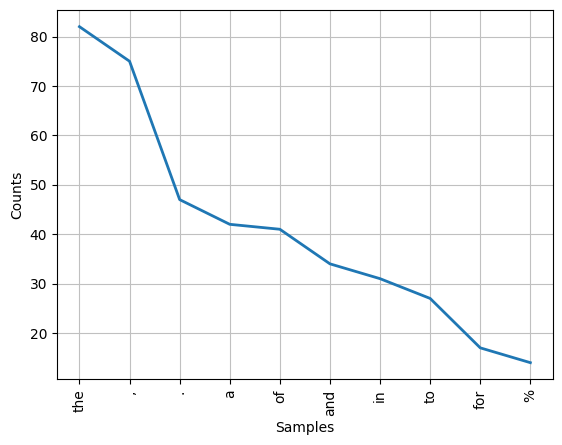

<Axes: xlabel='Samples', ylabel='Counts'>

In [ ]:
#plot the graph for fdist
import matplotlib.pyplot as plt

fdist.plot(10)

# Text Pre-Processing

In [ ]:
#empty list to store words
words_no_punc = []

#removing punctuatuion marks
for sublist in words:
    for word in sublist:
        # Check if the word consists only of alphabetical characters
        if word.isalpha():
            # Convert the word to lowercase and append it to the list
            words_no_punc.append(word.lower())

#print the words without punctuation marks
print(words_no_punc)

print("\n")

#length
print(len(words_no_punc))


['baseball', 'a', 'captivating', 'steeped', 'in', 'tradition', 'pits', 'two', 'squads', 'of', 'nine', 'players', 'against', 'each', 'other', 'in', 'a', 'battle', 'for', 'runs', 'across', 'a', 'field', 'the', 'game', 'unfolds', 'over', 'nine', 'innings', 'each', 'meticulously', 'divided', 'into', 'two', 'halves', 'during', 'the', 'top', 'half', 'one', 'team', 'takes', 'center', 'stage', 'as', 'their', 'batters', 'swing', 'for', 'the', 'fences', 'aiming', 'to', 'launch', 'the', 'ball', 'into', 'the', 'vast', 'expanse', 'of', 'the', 'outfield', 'and', 'sprint', 'around', 'the', 'bases', 'each', 'successful', 'circuit', 'adding', 'a', 'coveted', 'run', 'to', 'their', 'scorecard', 'the', 'opposing', 'team', 'transformed', 'into', 'a', 'defensive', 'unit', 'scrambles', 'to', 'thwart', 'their', 'offensive', 'maneuvers', 'deploying', 'dazzling', 'catches', 'and', 'throws', 'to', 'any', 'base', 'a', 'runner', 'might', 'dare', 'to', 'steal', 'as', 'the', 'final', 'out', 'of', 'the', 'top', 'half

In [ ]:
#import required libraries
from nltk.probability import FreqDist
import pandas as pd

#frequency distribution
fdist = FreqDist(words_no_punc)

# Get 10 most common words
most_common_words = fdist.most_common(10)

# Create a DataFrame from the list of most common words
df = pd.DataFrame(most_common_words, columns=['Word', 'Frequency'])

# Print the DataFrame
print(df)


    Word  Frequency
0    the         95
1      a         44
2     of         41
3    and         34
4     in         32
5     to         27
6    for         17
7  their         12
8   base         11
9    are         11


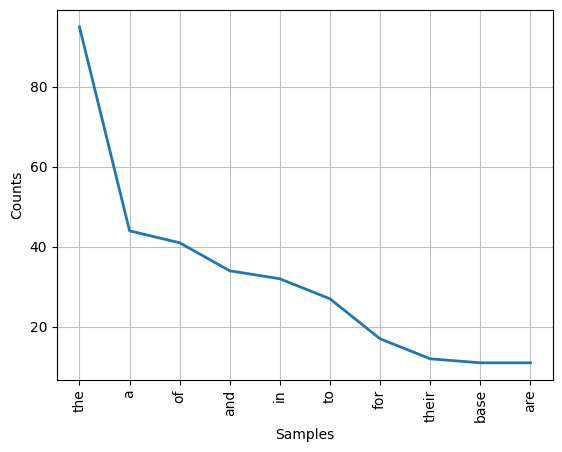

<Axes: xlabel='Samples', ylabel='Counts'>

In [ ]:
#Plotting graph without punctuation marks
##plot the most common words on graph
fdist.plot(10)

In [ ]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [ ]:
from nltk.corpus import stopwords

#List of stopwords
stopwords = stopwords.words("english")
print(stopwords)

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

In [ ]:
#removing stopwords
##empty list to store clean words
clean_words = []

for w in words_no_punc:
  if w not in stopwords:
    clean_words.append(w)

print(clean_words)
print("\n")
print(len(clean_words))

['baseball', 'captivating', 'steeped', 'tradition', 'pits', 'two', 'squads', 'nine', 'players', 'battle', 'runs', 'across', 'field', 'game', 'unfolds', 'nine', 'innings', 'meticulously', 'divided', 'two', 'halves', 'top', 'half', 'one', 'team', 'takes', 'center', 'stage', 'batters', 'swing', 'fences', 'aiming', 'launch', 'ball', 'vast', 'expanse', 'outfield', 'sprint', 'around', 'bases', 'successful', 'circuit', 'adding', 'coveted', 'run', 'scorecard', 'opposing', 'team', 'transformed', 'defensive', 'unit', 'scrambles', 'thwart', 'offensive', 'maneuvers', 'deploying', 'dazzling', 'catches', 'throws', 'base', 'runner', 'might', 'dare', 'steal', 'final', 'top', 'half', 'echoes', 'roles', 'gracefully', 'reverse', 'previous', 'defenders', 'morph', 'potent', 'offense', 'former', 'hitters', 'transform', 'defensive', 'wall', 'determined', 'shut', 'scoring', 'attempts', 'intricate', 'dance', 'offense', 'defense', 'continues', 'nine', 'innings', 'team', 'boasting', 'highest', 'run', 'total', 'g

In [ ]:
#import required libraries
from nltk.probability import FreqDist
import pandas as pd

#final distribusi frekuensi
fdist = FreqDist(clean_words)

# Get 10 most common words
most_common_words = fdist.most_common(10)

# Create a DataFrame from the list of most common words
df = pd.DataFrame(most_common_words, columns=['Word', 'Frequency'])

# Print the DataFrame
print(df)

          Word  Frequency
0         base         11
1    wellbeing         10
2       health          8
3      general          8
4         team          7
5    indonesia          6
6    defensive          5
7       public          5
8  individuals          5
9      quarter          5


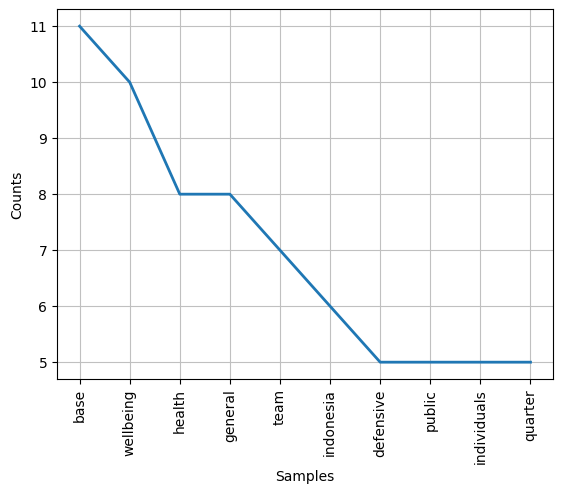

<Axes: xlabel='Samples', ylabel='Counts'>

In [ ]:
#plot the most common words on graph
fdist.plot(10)

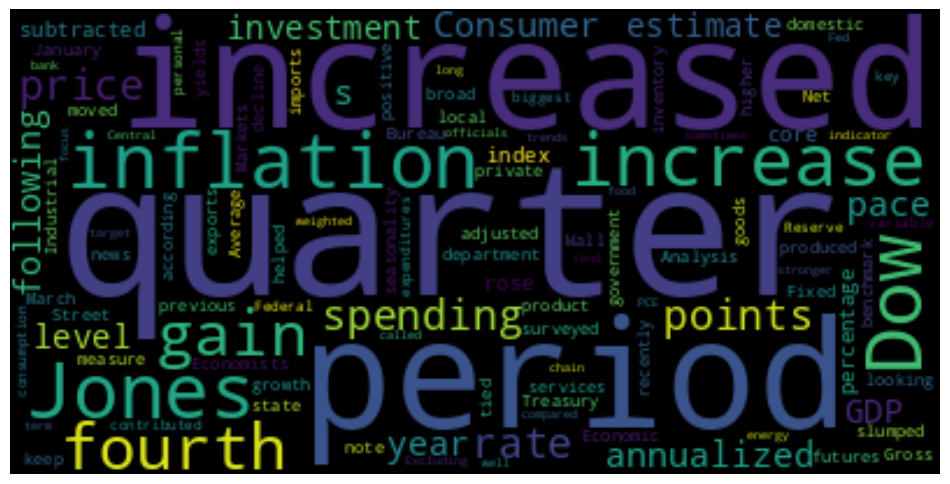

In [ ]:
# Word cloud python implementation
##library to form wordcloud
from wordcloud import WordCloud

##library to plot the wordcloud
import matplotlib.pyplot as plt

##generating the wordcloud
wordcloud = WordCloud().generate(text)

##plot the wordcloud
plt.figure(figsize=(12,12))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')  # Hide the axis
plt.show()

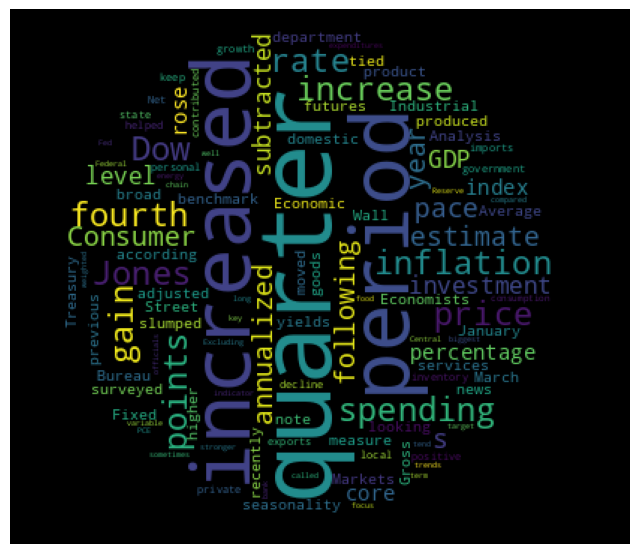

In [ ]:
#import required libraries
import numpy as np
from PIL import Image
from wordcloud import WordCloud

#menggunakan gambar bentuk lingkaran
char_mask = np.array(Image.open("circle.png"))

#generating wordcloud
wordcloud = WordCloud(background_color = "black",mask=char_mask).generate(text)

##plot the wordcloud
plt.figure(figsize=(8,8))
plt.imshow(wordcloud)
plt.axis('off')  # Hide the axis
plt.show()

# Extracting vectors from tect (Vectorization)

In [ ]:
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

# Instantiate the WordNetLemmatizer
lemmatizer = WordNetLemmatizer()

# Sample text data
text_sport = "Baseball, a captivating steeped in tradition, pits two squads of nine players against each other in a battle for runs across a diamond-shaped field. The game unfolds over nine innings, each meticulously divided into two halves. During the top half, one team takes center stage as their batters swing for the fences, aiming to launch the ball into the vast expanse of the outfield and sprint around the bases, each successful circuit adding a coveted run to their scorecard. The opposing team, transformed into a defensive unit, scrambles to thwart their offensive maneuvers, deploying dazzling catches and lightning-fast throws to any base a runner might dare to steal. As the final out of the top half echoes, the roles gracefully reverse. The previous defenders morph into a potent offense, while the former hitters transform into a defensive wall, determined to shut down any scoring attempts. This intricate dance of offense and defense continues for nine heart-stopping innings, with the team boasting the highest run total at the game's conclusion emerging victorious. The stage for this strategic ballet is a meticulously maintained diamond. Four cornerstones – home plate, first base, second base, and third base – mark the boundaries of this grassy battlefield. In the heart of the infield lies the pitcher's mound, a raised platform from where the pitcher, the maestro of the defensive orchestra, unleashes a barrage of precisely thrown balls towards the batter stationed at home plate. Beyond the infield, a vast expanse of green known as the outfield stretches outwards, bordered by the extended lines of first and third base. This simple act sets in motion a whirlwind of activity.  The batter races towards first base, hoping to reach it safely before a fielder throws the ball there.  Success in this daring dash earns them the right to be called a 'base runner,'' and they set their sights on the next base, and the next, until they complete the glorious loop around the diamond and touch home plate, bringing a run home for their team.  However, the defensive team isn't idle.  They strive to snatch the ball out of the air before it bounces, or with lightning reflexes, scoop it up and fire it towards a base to 'tag out' the runner before they make it. A batter's journey around the bases can be cut short in several ways. A dazzling catch by a fielder, a perfectly timed throw to first base, or the dreaded 'strikeout' – three missed swings at the pitcher's offerings – can all spell an out for the batter. Once the offensive team accumulates three outs, their turn at bat concludes, and the defensive team gets their chance to shine. Baseball's magic lies in its captivating blend of athleticism and strategy. Pitchers rely on cunning and precision to outwit batters, who in turn unleash their power and technique to launch the ball. Fielders showcase their agility and lightning-fast throws, while base runners weave their way around the diamond, using a combination of speed and smarts to evade tags. This dynamic interplay, combined with the sport's rich history, passionate fan base, and intricate statistical analysis, has cemented baseball's place as a beloved global pastime."
text_medical = "As of now Public Health in Indonesia can be said to be in a condition which is as of now showing signs of improvement, albeit there are still a few individuals who are living a long way from a sound way of life. The change in the state of Public Health in Indonesia is an indication of the media which frequently give instructive data so that the individuals are taught naturally. The significance of general wellbeing makes the science training secure a workforce which spends significant time in the field of general wellbeing. The administration desires on this workforce is to examine the general wellbeing for the future, so that the general public are fit for conveying a sound and insightful individuals in keeping up their own particular wellbeing and gang. The art of general wellbeing has an importance as the science and craft of averting infection, enhancing physical and emotional well-being. The point of keeping up productivity through composed group is to enhance ecological sanitation, the association of medicinal administrations and consideration, singular instruction on individual cleanliness for right on time analysis, preventive and social parts of advancement, which will bolster everybody in the group to have a solid expectations for everyday comforts to keep up their wellbeing. The Scope of Public wellbeing science in Indonesia is the Nutrition Society, the examination identified with sustenance has turned into an intriguing subject, in light of the fact that there are numerous individuals who are in consistence with the wholesome yet near to typical. It implies that the dietary ampleness rate in Indonesia, particularly in country groups are still low. Numerous individuals are as yet expending the nourishment which are not ideal supplements, it likewise causes numerous instances of ailing health et cetera. Great HR gets from a decent general wellbeing. Wholesome issues in Indonesia is an extraordinary issue which still cannot be tackled totally. Actually, there are numerous different parts of general wellbeing, for example, Epidemiology, Bio-insights, Environmental Health, Health Education and Behavior, Public Health Administration, Occupational Safety and Health and Reproductive Health which are still expected to be concerned.The significance of general wellbeing in Indonesia ought to truly get more consideration, in light of the fact that society is an impression of a nation. However the Country will keep developing on account of the presence of its Human Resources."
text_finance = "Gross domestic product, a broad measure of goods and services produced in the January-through-March period, increased at a 1.6% annualized pace when adjusted for seasonality and inflation, according to the department’s Bureau of Economic Analysis. Economists surveyed by Dow Jones had been looking for an increase of 2.4% following a 3.4% gain in the fourth quarter of 2023 and 4.9% in the previous period. Markets slumped following the news, with futures tied to the Dow Jones Industrial Average off more than 400 points. Treasury yields moved higher, with the benchmark 10-year note most recently at 4.69%. Consumer spending increased 2.5% in the period, down from a 3.3% gain in the fourth quarter and below the 3% Wall Street estimate. Fixed investment and government spending at the state and local level helped keep GDP positive on the quarter, while a decline in private inventory investment and an increase in imports subtracted. Net exports subtracted 0.86 percentage points from the growth rate while consumer spending contributed 1.68 percentage points. The personal consumption expenditures price index, a key inflation variable for the Federal Reserve, rose at a 3.4% annualized pace for the quarter, its biggest gain in a year and up from 1.8% in the fourth quarter. Excluding food and energy, core PCE prices rose at a 3.7% rate, both well above the Fed’s 2% target. Central bank officials tend to focus on core inflation as a stronger indicator of long-term trends. The price index for GDP, sometimes called the “chain-weighted” level, increased at a 3.1% rate, compared to the Dow Jones estimate for a 3% increase."

texts = [text_sport, text_medical, text_finance]
bow_keys = []
corpus_texts = []
for text in texts:
    words = word_tokenize(text)
    words_clean = [lemmatizer.lemmatize(word.lower()) for word in words if word.lower() not in set(stopwords.words('english'))]
    bow_keys += words_clean
    text_clean = ' '.join(words_clean)
    corpus_texts.append(text_clean)

bow_keys = set(bow_keys)
print(bow_keys)   # Cleaned Data
print(corpus_texts)   # Cleaned Data

{'market', 'particularly', '2023', 'insightful', 'emotional', 'give', '2', 'launch', 'significant', 'intricate', '–', 'enhance', 'expending', 'seasonality', 'human', 'reflex', 'bringing', 'secure', 'final', 'service', 'stage', 'dow', 'strategy', 'expectation', 'subtracted', 'lightning-fast', 'government', "''", 'using', 'barrage', 'strategic', 'rich', 'increased', 'agility', 'victorious', 'known', 'gain', 'second', 'showcase', 'dare', 'scope', 'bordered', 'public', 'science', 'earns', 'annualized', 'fixed', 'precisely', 'outwards', 'occupational', 'energy', 'place', 'treasury', 'import', 'et', 'pace', 'bio-insights', 'individual', 'higher', 'fact', 'fourth', 'emerging', 'morph', 'core', 'helped', 'pit', 'role', 'rely', 'measure', 'short', 'nourishment', 'dreaded', "'strikeout", 'comfort', 'sprint', 'decline', 'issue', 'perfectly', 'examination', 'indonesia', 'fit', 'wall', 'sanitation', 'social', 'news', 'ecological', 'loop', 'heart-stopping', 'plate', 'might', 'timed', 'inventory', 's

In [ ]:
# A new text to be classified based on topic
query_text = "Cristiano Ronaldo came off the bench to earn Manchester United a hard-fought 2-1 victory at Everton in the Premier League on Sunday, taking his career goal tally to 700 in the process. Just as United did last weekend in their derby mauling at the hands of local rivals Manchester City, they again found themselves behind early on at Goodison Park after Alex Iwobi curled a sublime strike into the net from 20 metres."
query_words = word_tokenize(query_text)
query_words_clean = [lemmatizer.lemmatize(word) for word in query_words if word not in set(stopwords.words('english'))]
query_words_corpus = [word for word in query_words_clean if word in set(bow_keys)]
query_text_corpus = ' '.join(query_words_corpus)
corpus_texts.append(query_text_corpus)

from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer() ## Creating Object for CountVectorizer
bow_vectors = cv.fit_transform(corpus_texts).toarray()
print(bow_vectors)
print(len(bow_vectors[0]))

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 2 0]
 [1 1 1 ... 2 0 1]
 [0 0 0 ... 0 0 0]]
467


In [ ]:
# Normalize the BoW vectors
bow_texts_norm = []
for bow in bow_vectors:
  length = (sum(i*i for i in bow)) ** 0.5
  bow_norm = bow / length
  bow_texts_norm.append(bow_norm)

# Compute similarity using dot product
similarity_vector = []
bow_norm_query = bow_texts_norm[3]
for bow in bow_texts_norm[:3]:
  similarity_vector.append(sum(i*j for i,j in zip(bow,bow_norm_query)))
print(similarity_vector)

# Find the highest similarity
id_max_sim = similarity_vector.index(max(similarity_vector))
if (id_max_sim == 0):
  print ("The query text is classified as: Finance")
elif (id_max_sim == 1):
  print ("The query text is classified as: Medical")
elif (id_max_sim == 2):
  print ("The query text is classified as: Sport")


[0.0, 0.0, 0.08481889296799709]
The query text is classified as: Sport


# Kesimpulan
Setelah dilakukannya beberapa kategori terhadap teks sport, medical, finance dan menambahkan query text untuk klasifikasi, maka query teks "Cristiano Ronaldo came off the bench to earn Manchester United a hard-fought 2-1 victory at Everton in the Premier League on Sunday, taking his career goal tally to 700 in the process. Just as United did last weekend in their derby mauling at the hands of local rivals Manchester City, they again found themselves behind early on at Goodison Park after Alex Iwobi curled a sublime strike into the net from 20 metres." termasuk ke dalam klasifikasi "Sport" dengan similarity vector nya adalah [0.0, 0.0, 0.08481889296799709].
